In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


# Import Dataset

In [347]:
nama_id_univ = pd.read_csv(r"C:\Users\raislinten17\Downloads\Project\Nilai UTBK 2019\nama_id_univ.csv", sep=";")
major = pd.read_csv(r"C:\Users\raislinten17\Downloads\Project\Nilai UTBK 2019\majors.csv", sep=",")
pasgrade = pd.read_csv(r"C:\Users\raislinten17\Downloads\Project\Nilai UTBK 2019\passing-grade.csv", sep=",")
skorsos = pd.read_csv(r"C:\Users\raislinten17\Downloads\Project\Nilai UTBK 2019\score_humanities.csv")
skorsaintek=pd.read_csv('https://raw.githubusercontent.com/Peksyaji/UTBK-2019/main/score_science.csv',sep=",")

# Data Cleansing UTBK Sosial

In [348]:
nama_id_univ
# major
# pasgrade
# skorsos
skorsaintek

# eko=ekonomi
# geo=geografi
# kmb=
# kpu=kem. penalaran umum
# kua=
# mat=math
# ppu=peng pemahaman umum 
# sej=sejarah?
# sos=sosiologi

Unnamed: 0  id_first_major  id_first_university  id_second_major  \
0               0         3321065                  332          3331187   
1               1         3211015                  321          3611066   
2               2         3721093                  372          3551302   
3               3         3321096                  332          3551194   
4               4         5211104                  521          5211085   
...           ...             ...                  ...              ...   
86565       86565         1411161                  141          1421147   
86566       86566         3561262                  356          3571055   
86567       86567         3531182                  353          3561022   
86568       86568         1121094                  112          1221095   
86569       86569         1911286                  191          1921056   

       id_second_university  id_user  score_bio  score_fis  score_kim  \
0                       333        4        400        400        400   
1                       361       14        816        666        651   
2                       355       19        562        839        624   
3                       355       23        700        669        692   
4                       521       28        461        619        441   
...                     ...      ...        ...        ...        ...   
86565                   142   344111        516        412        376   
86566                   357   344125        334        634        435   
86567                   356   344127        316        717        421   
86568                   122   344151        592        451        583   
86569                   192   344192        411        602        415   

       score_kmb  score_kpu  score_kua  score_mat  score_ppu  
0            400        400        400        400        400  
1            678        685        706        695        562  
2            700        781        464        551        668  
3            679        692        813        507        573  
4            593        563        500        666        370  
...          ...        ...        ...        ...        ...  
86565        546        523        490        549        520  
86566        613        461        390        399        554  
86567        474        494        483        327        554  
86568        437        447        485        508        492  
86569        519        540        445        494        547  

[86570 rows x 14 columns]

In [349]:
skorsaintek.dtypes

Unnamed: 0              int64
id_first_major          int64
id_first_university     int64
id_second_major         int64
id_second_university    int64
id_user                 int64
score_bio               int64
score_fis               int64
score_kim               int64
score_kmb               int64
score_kpu               int64
score_kua               int64
score_mat               int64
score_ppu               int64
dtype: object

In [350]:
# Daftar kolom yang ingin diubah tipe datanya
columns_to_convert = ['id_first_major','id_first_university','id_second_major','id_second_university','id_user']

# Mengubah tipe data kolom-kolom menjadi object
skorsos[columns_to_convert] = skorsos[columns_to_convert].astype(object)

print(skorsos.dtypes)

Unnamed: 0               int64
id_first_major          object
id_first_university     object
id_second_major         object
id_second_university    object
id_user                 object
score_eko                int64
score_geo                int64
score_kmb                int64
score_kpu                int64
score_kua                int64
score_mat                int64
score_ppu                int64
score_sej                int64
score_sos                int64
dtype: object


####  Ceritanya kroschek id univ apakah ada yang tidak seragam 

In [351]:
validation_results = []

# Loop melalui setiap nilai dalam kolom 'id_first_university'
for id_universitas in skorsos['id_first_university']:
    if isinstance(id_universitas, int) and 100 <= id_universitas <= 999 and isinstance(id_universitas, int) and 100 <= id_universitas <= 999:
        validation_results.append('benar')
    else:
        validation_results.append('salah')
    
skorsos['id_univ_valid']=validation_results
skorsos

Unnamed: 0 id_first_major id_first_university id_second_major  \
0               0        3322014                 332         3532154   
1               1        3212057                 321         3322022   
2               2        3722057                 372         1912042   
3               3        3212081                 321         3212301   
4               4        3812106                 381         3852034   
...           ...            ...                 ...             ...   
61197       61197        3552127                 355         6212115   
61198       61198        3512053                 351         3532057   
61199       61199        6212115                 621         6212107   
61200       61200        3812056                 381         3822012   
61201       61201        3562362                 356         3562192   

      id_second_university id_user  score_eko  score_geo  score_kmb  \
0                      353      26        778        486        679   
1                      332      35        579        631        710   
2                      191      44        600        481        314   
3                      321      55        559        563        646   
4                      385     171        838        734        654   
...                    ...     ...        ...        ...        ...   
61197                  621  328356        521        497        498   
61198                  353  328357        638        464        548   
61199                  621  328364        491        601        567   
61200                  382  328366        573        544        634   
61201                  356  328373        561        627        468   

       score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  \
0            594        643        686        559        392        676   
1            700        810        656        638        535        686   
2            432        522        494        461        467        574   
3            638        591        538        585        647        589   
4            613        690        315        628        660        674   
...          ...        ...        ...        ...        ...        ...   
61197        522        573        575        541        599        459   
61198        576        541        492        548        435        459   
61199        486        492        476        518        409        434   
61200        672        527        526        504        696        463   
61201        457        530        462        524        466        712   

      id_univ_valid  
0             benar  
1             benar  
2             benar  
3             benar  
4             benar  
...             ...  
61197         benar  
61198         benar  
61199         benar  
61200         benar  
61201         benar  

[61202 rows x 16 columns]

In [352]:
# mencari tahu berapa yang id univnya nya salah
jumlah_benar=(skorsos['id_univ_valid'] == 'benar').sum()
print(jumlah_benar)
jumlah_salah=(skorsos['id_univ_valid'] == 'salah').sum()
jumlah_salah

61198


4

In [353]:
# nyoba sort untuk melihat detail perbedaan nya
sort=skorsos.sort_values( by='id_second_university', ascending=False)
sort

Unnamed: 0 id_first_major id_first_university id_second_major  \
10907       10907        3552046                 355         9212042   
48350       48350        9212011                 921         9212042   
19340       19340        9212065                 921         9212011   
19280       19280        9112025                 911         9212042   
39347       39347        3722146                 372         9212073   
...           ...            ...                 ...             ...   
40883       40883        1112041                 111         1112176   
14270       14270           2333                  67            2329   
24727       24727            766                  24            1622   
24704       24704            800                  25             878   
22324       22324            253                   9             253   

      id_second_university id_user  score_eko  score_geo  score_kmb  \
10907                  921   79597        563        666        712   
48350                  921  277845        566        457        443   
19340                  921  130348        571        532        473   
19280                  921  129964        591        631        630   
39347                  921  235762        636        403        571   
...                    ...     ...        ...        ...        ...   
40883                  111  245054        455        253        420   
14270                   67   99695        516        431        534   
24727                   49  167614        730        695        750   
24704                   27  167466        380        424        486   
22324                    9  150201        487        507        557   

       score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  \
10907        659        599        404        574        568        576   
48350        417        528        524        506        484        498   
19340        492        432        493        520        471        520   
19280        521        556        561        568        461        738   
39347        510        465        667        487        590        476   
...          ...        ...        ...        ...        ...        ...   
40883        418        444        466        439        535        460   
14270        497        391        648        437        448        408   
24727        587        739        744        530        690        433   
24704        477        394        402        463        609        464   
22324        521        428        339        461        424        432   

      id_univ_valid  
10907         benar  
48350         benar  
19340         benar  
19280         benar  
39347         benar  
...             ...  
40883         benar  
14270         salah  
24727         salah  
24704         salah  
22324         salah  

[61202 rows x 16 columns]

In [354]:
skorsos.sort_values(by='id_univ_valid', ascending=False)

Unnamed: 0 id_first_major id_first_university id_second_major  \
22324       22324            253                   9             253   
24704       24704            800                  25             878   
14270       14270           2333                  67            2329   
24727       24727            766                  24            1622   
0               0        3322014                 332         3532154   
...           ...            ...                 ...             ...   
20404       20404        3242087                 324         3362093   
20405       20405        3562404                 356         3812064   
20406       20406        3532107                 353         3532081   
20407       20407        3212185                 321         3222117   
61201       61201        3562362                 356         3562192   

      id_second_university id_user  score_eko  score_geo  score_kmb  \
22324                    9  150201        487        507        557   
24704                   27  167466        380        424        486   
14270                   67   99695        516        431        534   
24727                   49  167614        730        695        750   
0                      353      26        778        486        679   
...                    ...     ...        ...        ...        ...   
20404                  336  136937        571        406        293   
20405                  381  136940        660        605        599   
20406                  353  136952        515        563        613   
20407                  322  136957        612        460        480   
61201                  356  328373        561        627        468   

       score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  \
22324        521        428        339        461        424        432   
24704        477        394        402        463        609        464   
14270        497        391        648        437        448        408   
24727        587        739        744        530        690        433   
0            594        643        686        559        392        676   
...          ...        ...        ...        ...        ...        ...   
20404        331        512        530        489        537        704   
20405        614        621        400        644        551        798   
20406        611        595        522        543        713        517   
20407        412        537        539        518        552        496   
61201        457        530        462        524        466        712   

      id_univ_valid  
22324         salah  
24704         salah  
14270         salah  
24727         salah  
0             benar  
...             ...  
20404         benar  
20405         benar  
20406         benar  
20407         benar  
61201         benar  

[61202 rows x 16 columns]

####  mengeluarkan id univ salah dari dataframe

In [355]:
valid_skorsos=skorsos[skorsos['id_univ_valid'] == 'benar']

##### mengeluarkan variabel yang ngga begitu perlu 

In [356]:
skorsos_new=valid_skorsos[['id_first_major', 'id_first_university', 'id_user', 'score_eko', 'score_geo',
       'score_kmb', 'score_kpu', 'score_kua', 'score_mat', 'score_ppu',
       'score_sej', 'score_sos']]

##### DATASET YANG MAU DIGUNAKAN SOSIAL
##### skorsos_new

In [357]:
skorsos_new.head()

id_first_major id_first_university id_user  score_eko  score_geo  score_kmb  \
0        3322014                 332      26        778        486        679   
1        3212057                 321      35        579        631        710   
2        3722057                 372      44        600        481        314   
3        3212081                 321      55        559        563        646   
4        3812106                 381     171        838        734        654   

   score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  
0        594        643        686        559        392        676  
1        700        810        656        638        535        686  
2        432        522        494        461        467        574  
3        638        591        538        585        647        589  
4        613        690        315        628        660        674

##### merge dataframe nama_id_univ dan skorsos_new untk mendapatkan nama univ

In [358]:
# Gabungkan berdasarkan kolom 'id_first_university' dan 'id'
df_skor_utbk = skorsos_new.merge(nama_id_univ, left_on='id_first_university', right_on='id', how='left')


In [359]:
df_skor_utbk = df_skor_utbk.merge(major, left_on='id_first_major', right_on='id_major', how='left')

In [360]:
df_skor_utbk.head()

id_first_major id_first_university id_user  score_eko  score_geo  score_kmb  \
0        3322014                 332      26        778        486        679   
1        3212057                 321      35        579        631        710   
2        3722057                 372      44        600        481        314   
3        3212081                 321      55        559        563        646   
4        3812106                 381     171        838        734        654   

   score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos   id  \
0        594        643        686        559        392        676  332   
1        700        810        656        638        535        686  321   
2        432        522        494        461        467        574  372   
3        638        591        538        585        647        589  321   
4        613        690        315        628        660        674  381   

             nama_Universitas  Unnamed: 0  id_major  id_university  \
0  Institut Teknologi Bandung        2149   3322014            332   
1       Universitas Indonesia        2051   3212057            321   
2       Universitas Brawijaya        2518   3722057            372   
3       Universitas Indonesia        2054   3212081            321   
4       Universitas Airlangga        2594   3812106            381   

         type                           major_name  capacity  
0  humanities  FAKULTAS SENIRUPA DAN DESAIN (FSRD)       100  
1  humanities                      ILMU KOMUNIKASI        40  
2  humanities                            MANAJEMEN       112  
3  humanities                          KRIMINOLOGI        24  
4  humanities                            AKUNTANSI       100

In [361]:
df_skor_utbk1=df_skor_utbk[[ 'id_user','id_first_university','nama_Universitas', 'id_first_major','major_name', 'score_eko',
       'score_geo', 'score_kmb', 'score_kpu', 'score_kua', 'score_mat',
       'score_ppu', 'score_sej', 'score_sos' ]]

##### DATA 1 SIAP SAJI

In [362]:
dfcompleteIIS=df_skor_utbk1.copy(deep=True)
dfcompleteIIS.head()

id_user id_first_university            nama_Universitas id_first_major  \
0      26                 332  Institut Teknologi Bandung        3322014   
1      35                 321       Universitas Indonesia        3212057   
2      44                 372       Universitas Brawijaya        3722057   
3      55                 321       Universitas Indonesia        3212081   
4     171                 381       Universitas Airlangga        3812106   

                            major_name  score_eko  score_geo  score_kmb  \
0  FAKULTAS SENIRUPA DAN DESAIN (FSRD)        778        486        679   
1                      ILMU KOMUNIKASI        579        631        710   
2                            MANAJEMEN        600        481        314   
3                          KRIMINOLOGI        559        563        646   
4                            AKUNTANSI        838        734        654   

   score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  
0        594        643        686        559        392        676  
1        700        810        656        638        535        686  
2        432        522        494        461        467        574  
3        638        591        538        585        647        589  
4        613        690        315        628        660        674

# Cleansing untuk dataset UTBK MIPA

In [363]:
skorsaintek.columns

Index(['Unnamed: 0', 'id_first_major', 'id_first_university',
       'id_second_major', 'id_second_university', 'id_user', 'score_bio',
       'score_fis', 'score_kim', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu'],
      dtype='object')

In [364]:
skorsaintek=skorsaintek[['id_user','id_first_university','id_first_major', 'score_bio',
       'score_fis', 'score_kim', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu']]

In [365]:
skorsaintek=skorsaintek.merge(nama_id_univ, left_on='id_first_university', right_on='id', how='left')

In [366]:
skorsaintek=skorsaintek.merge(major, left_on='id_first_major', right_on='id_major', how='left')

In [367]:
skorsaintek.columns

Index(['id_user', 'id_first_university', 'id_first_major', 'score_bio',
       'score_fis', 'score_kim', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu', 'id', 'nama_Universitas', 'Unnamed: 0',
       'id_major', 'id_university', 'type', 'major_name', 'capacity'],
      dtype='object')

In [368]:
df_skor_utbk2=skorsaintek[['id_user', 'id_first_university', 'nama_Universitas', 'id_first_major','major_name','score_bio',
       'score_fis', 'score_kim', 'score_kmb', 'score_kpu', 'score_kua',
       'score_mat', 'score_ppu']]

In [369]:
dfcompleteIPA=df_skor_utbk2.copy(deep=True)

In [370]:
dfcompleteIPA.head(3)

id_user  id_first_university            nama_Universitas  id_first_major  \
0        4                  332  Institut Teknologi Bandung         3321065   
1       14                  321       Universitas Indonesia         3211015   
2       19                  372       Universitas Brawijaya         3721093   

                                   major_name  score_bio  score_fis  \
0  SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS        400        400   
1                           PENDIDIKAN DOKTER        816        666   
2                   ILMU DAN TEKNOLOGI PANGAN        562        839   

   score_kim  score_kmb  score_kpu  score_kua  score_mat  score_ppu  
0        400        400        400        400        400        400  
1        651        678        685        706        695        562  
2        624        700        781        464        551        668

# EDA

##### daftar dataset 


dfcompleteIPA

dfcompleteIIS

# Menambahkan Data Average

In [371]:
# Contoh data Soshum
databantu=dfcompleteIIS
databantu=databantu.iloc[:,5:-1].sum(axis=1)/9
dfcompleteIIS['rata2nilai']=databantu
dfcompleteIIS.head()

id_user id_first_university            nama_Universitas id_first_major  \
0      26                 332  Institut Teknologi Bandung        3322014   
1      35                 321       Universitas Indonesia        3212057   
2      44                 372       Universitas Brawijaya        3722057   
3      55                 321       Universitas Indonesia        3212081   
4     171                 381       Universitas Airlangga        3812106   

                            major_name  score_eko  score_geo  score_kmb  \
0  FAKULTAS SENIRUPA DAN DESAIN (FSRD)        778        486        679   
1                      ILMU KOMUNIKASI        579        631        710   
2                            MANAJEMEN        600        481        314   
3                          KRIMINOLOGI        559        563        646   
4                            AKUNTANSI        838        734        654   

   score_kpu  score_kua  score_mat  score_ppu  score_sej  score_sos  \
0        594        643        686        559        392        676   
1        700        810        656        638        535        686   
2        432        522        494        461        467        574   
3        638        591        538        585        647        589   
4        613        690        315        628        660        674   

   rata2nilai  
0  535.222222  
1  584.333333  
2  419.000000  
3  529.666667  
4  570.222222

In [372]:
# Contoh data IPA
databantu2=dfcompleteIPA
databantu2=databantu2.iloc[:,5:-1].sum(axis=1)/9
dfcompleteIPA['rata2nilai']=databantu
dfcompleteIPA.head()

id_user  id_first_university            nama_Universitas  id_first_major  \
0        4                  332  Institut Teknologi Bandung         3321065   
1       14                  321       Universitas Indonesia         3211015   
2       19                  372       Universitas Brawijaya         3721093   
3       23                  332  Institut Teknologi Bandung         3321096   
4       28                  521    Universitas Palangkaraya         5211104   

                                   major_name  score_bio  score_fis  \
0  SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS        400        400   
1                           PENDIDIKAN DOKTER        816        666   
2                   ILMU DAN TEKNOLOGI PANGAN        562        839   
3   FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD)        700        669   
4   TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA)        461        619   

   score_kim  score_kmb  score_kpu  score_kua  score_mat  score_ppu  \
0        400        400        400        400        400        400   
1        651        678        685        706        695        562   
2        624        700        781        464        551        668   
3        692        679        692        813        507        573   
4        441        593        563        500        666        370   

   rata2nilai  
0  535.222222  
1  584.333333  
2  419.000000  
3  529.666667  
4  570.222222

### VISUALISASI PLOTLY

In [373]:

#nilai rata rata per univ
univ_avrg=dfcompleteIPA.groupby('nama_Universitas')['rata2nilai'].mean().reset_index().sort_values('rata2nilai', ascending=True)
univ_avrg=univ_avrg.nlargest(20,'rata2nilai')
univ_avrg = univ_avrg[::-1]

#membuat histogram
fig=px.histogram(univ_avrg,x='rata2nilai',y='nama_Universitas',labels={'rata2nilai':'Nilai','nama_Universitas':'Universitas'})

# Mengubah tema plot
fig.update_layout(
    template='plotly_dark',  # Menggunakan tema gelap
    paper_bgcolor='rgb(18,18,18)',  # Latar belakang plot
    plot_bgcolor='rgb(18,18,18)',   # Warna latar belakang plot area
    font=dict(color='white')  # Warna teks
)
# Menambahkan label nilai pada masing-masing bar
fig.update_traces(text=univ_avrg['rata2nilai'].round(1).astype(str), textposition='inside',)

#Judul
fig.update_layout(title='Rata-Rata Nilai Pendaftar UTBK Soshum 2019 per Univ ')

fig.show()


In [374]:

#nilai rata rata per univ
univ_avrgIIS=dfcompleteIIS.groupby('nama_Universitas')['rata2nilai'].mean().reset_index().sort_values('rata2nilai', ascending=True)
univ_avrgIIS=univ_avrgIIS.nlargest(20,'rata2nilai')
univ_avrgIIS= univ_avrgIIS[::-1]

#membuat histogram
fig=px.histogram(univ_avrg,x='rata2nilai',y='nama_Universitas',labels={'rata2nilai':'Nilai','nama_Universitas':'Universitas'})

# Mengubah tema plot
fig.update_layout(
    template='plotly_dark',  # Menggunakan tema gelap
    paper_bgcolor='rgb(18,18,18)',  # Latar belakang plot
    plot_bgcolor='rgb(18,18,18)',   # Warna latar belakang plot area
    font=dict(color='white')  # Warna teks
)
# Menambahkan label nilai pada masing-masing bar
fig.update_traces(text=univ_avrg['rata2nilai'].round(1).astype(str), textposition='inside',)

#Judul
fig.update_layout(title='Rata-Rata Nilai Pendaftar UTBK Saintek 2019 per Univ ')

fig.show()


### VISUALISASI LAIN

In [398]:
mean_majorIPA=dfcompleteIPA.head(20).groupby('major_name')['rata2nilai'].mean().reset_index().sort_values('rata2nilai', ascending=False)

mean_majorIPA

major_name  rata2nilai
14          TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA)  570.222222
13                                   TEKNIK INDUSTRI   559.111111
2                                            BIOKIMIA  552.444444
5                                       ILMU AKTUARIA  543.222222
15                       TEKNOLOGI INDUSTRI PERTANIAN  535.333333
12         SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS  535.222222
1                                            AKTUARIA  534.888889
3           FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD)  529.666667
9                                   PENDIDIKAN DOKTER  507.755556
7                                          KEDOKTERAN  503.666667
4   FAKULTAS TEKNOLOGI INDUSTRI (FTI) - KAMPUS GANESA  495.222222
0                    AGROTEKNOLOGI / AGROEKOTEKNOLOGI  468.111111
11                                          PSIKOLOGI  468.111111
10                            PENDIDIKAN DOKTER GIGI   458.222222
8                     KESELAMATAN DAN KESEHATAN KERJA  450.222222
6                           ILMU DAN TEKNOLOGI PANGAN  419.000000

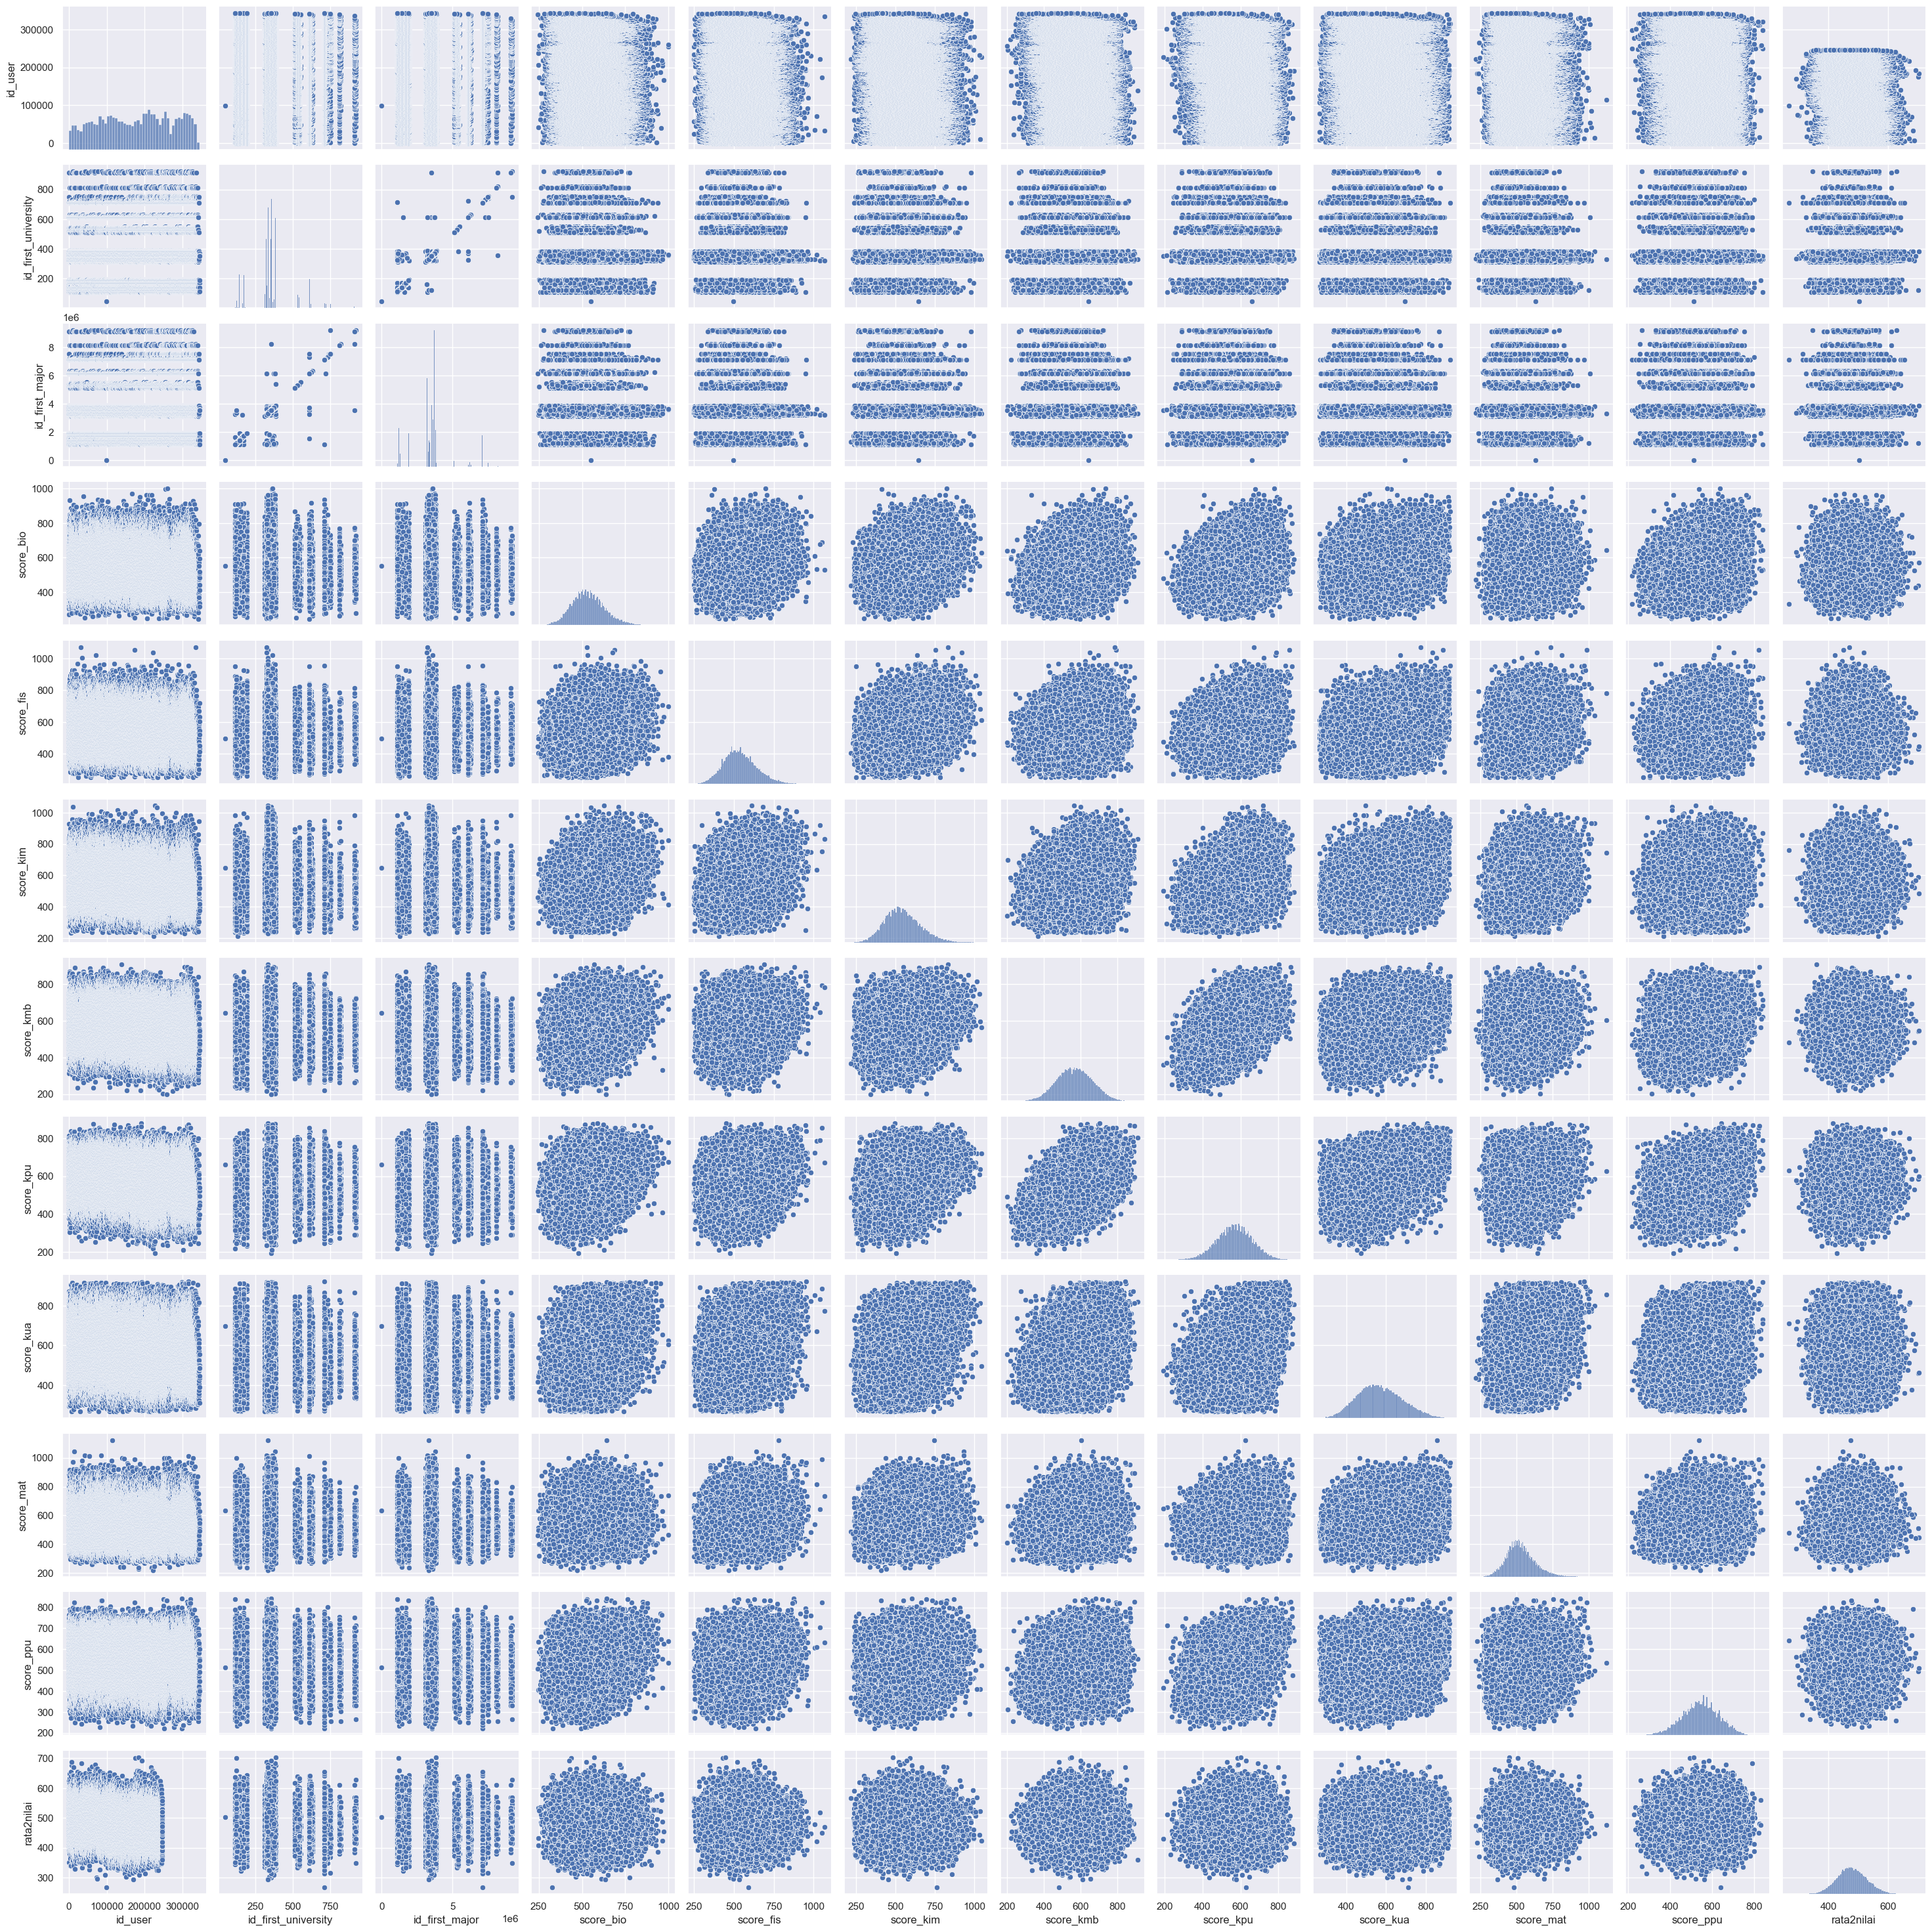

In [407]:
sns.pairplot(dfcompleteIPA)

<function matplotlib.pyplot.show(close=None, block=None)>

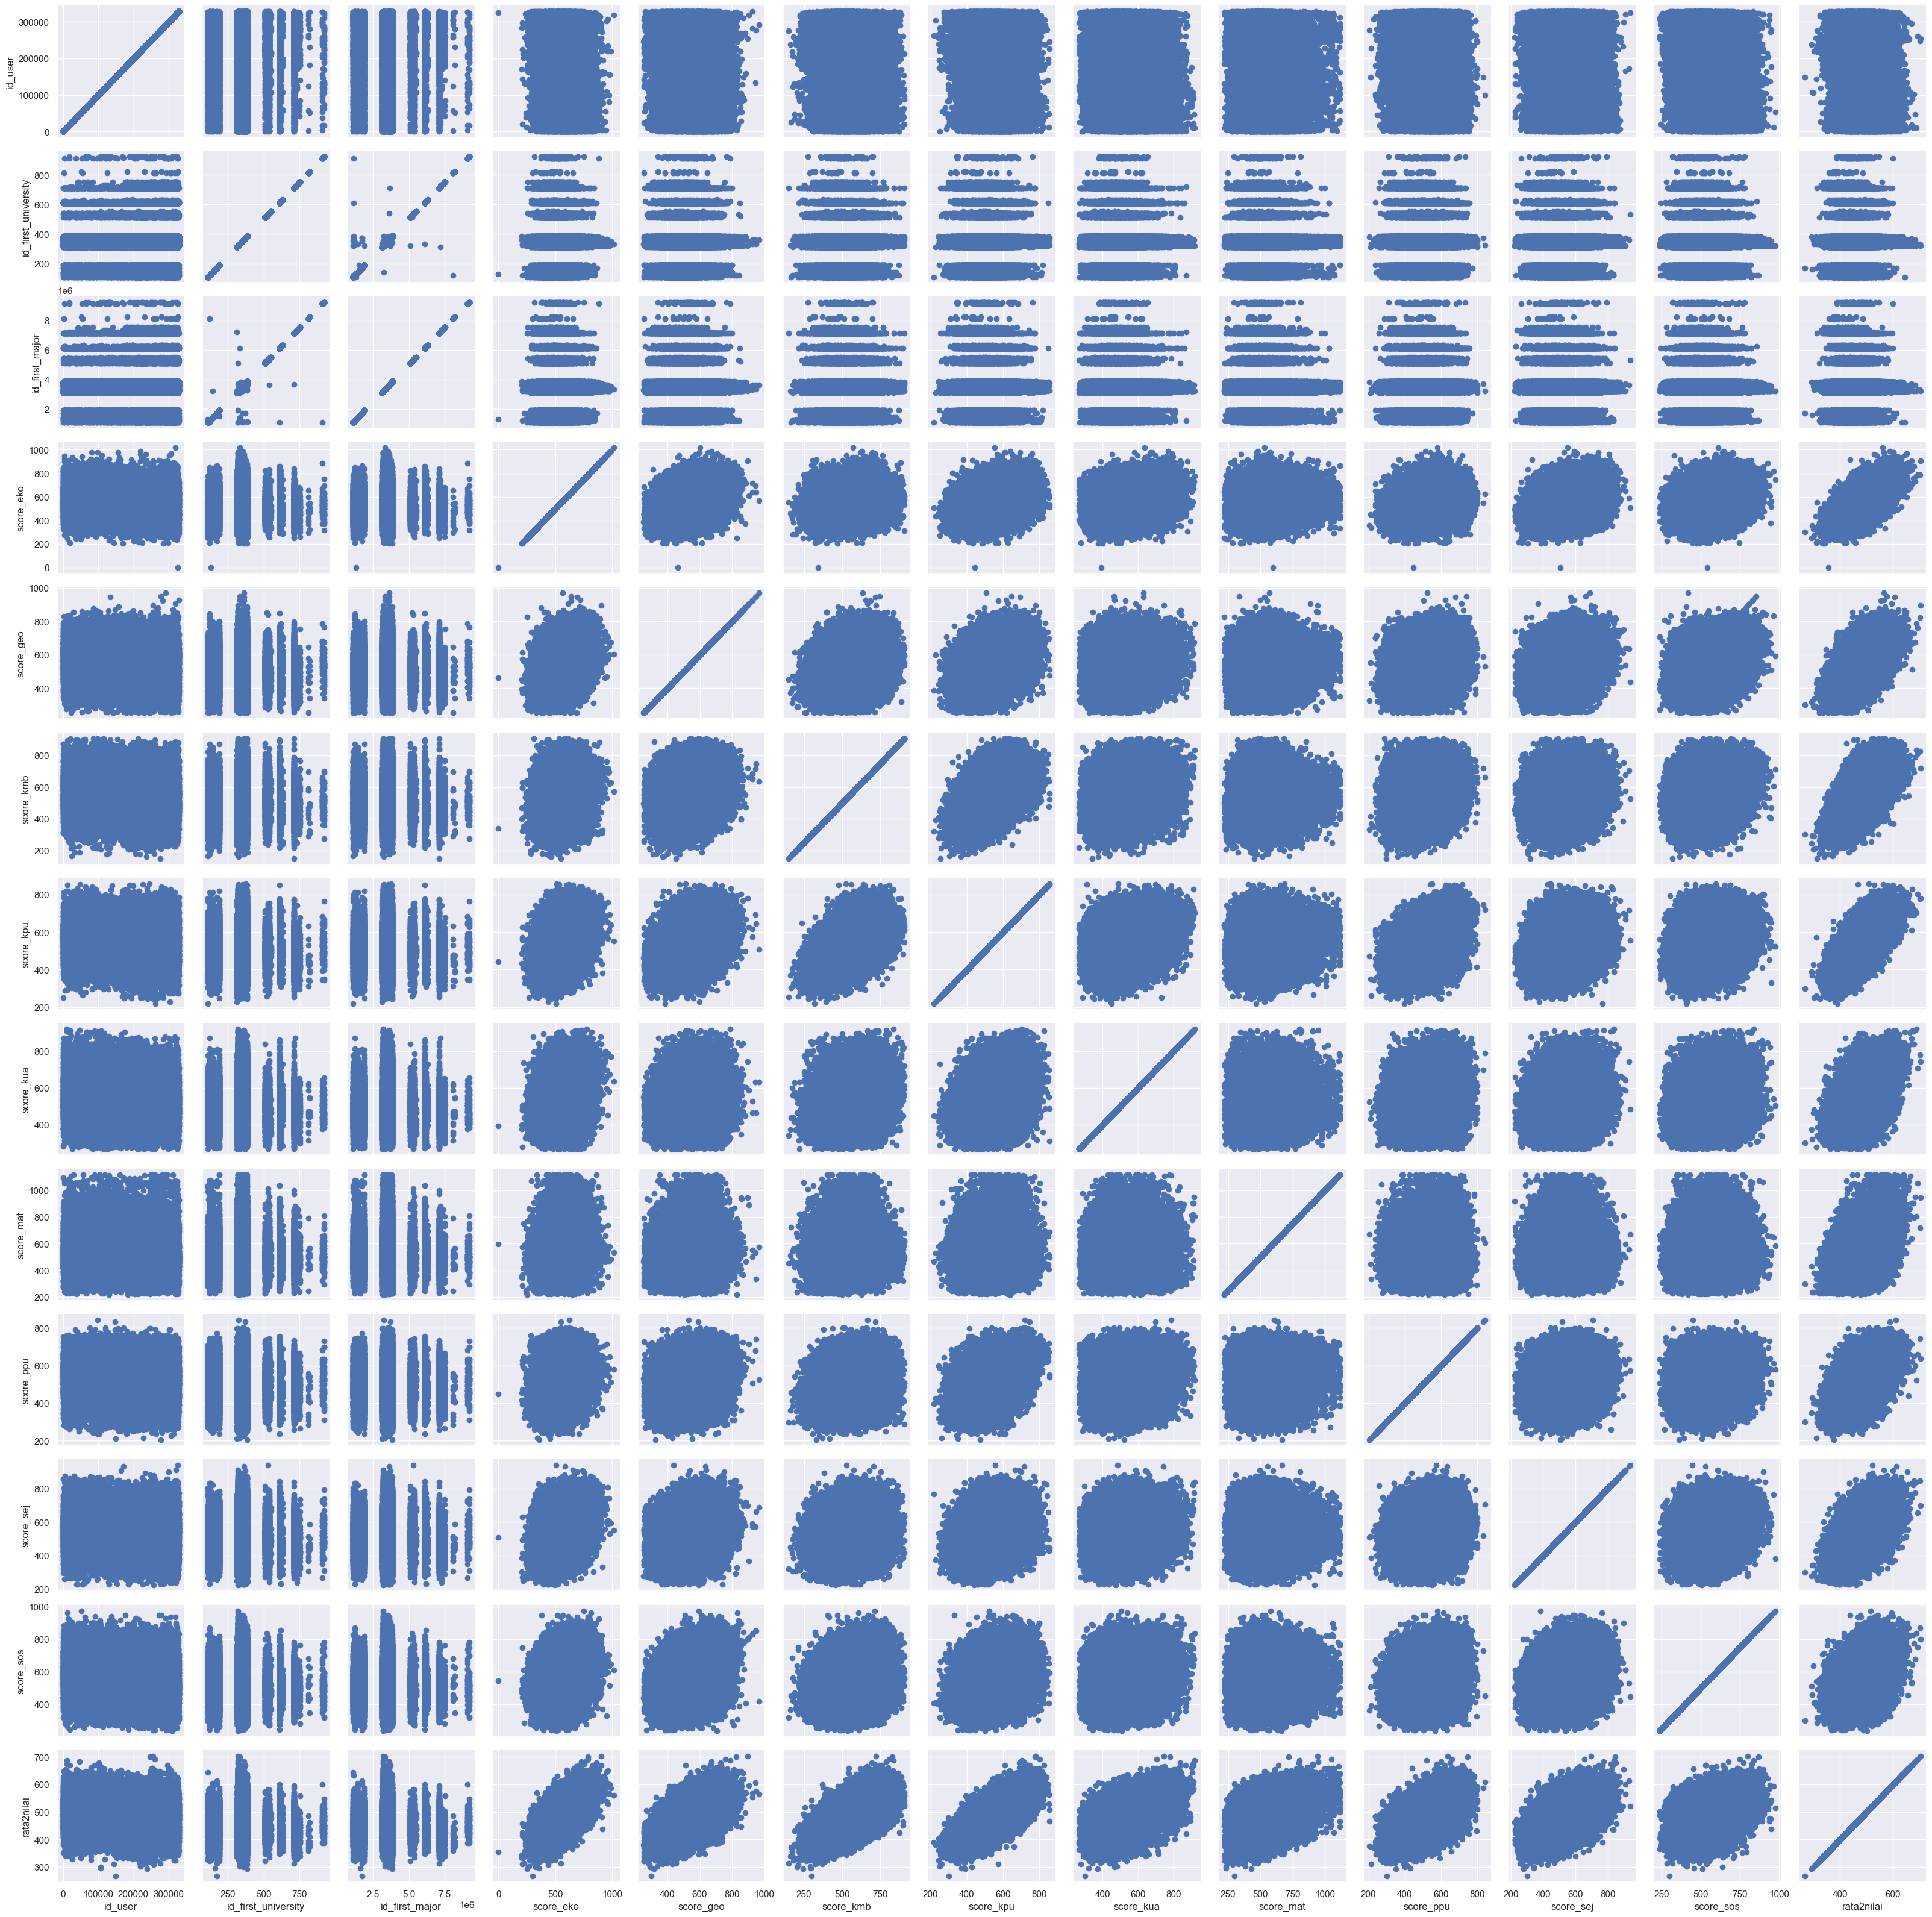

In [408]:
p=sns.PairGrid(dfcompleteIIS)
p.map(plt.scatter)
plt.show